<a href="https://colab.research.google.com/github/Subliminal01/Image-classification/blob/main/image_classification_using_custom_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# ! unzip '/content/drive/MyDrive/Object detection/to_be_used.zip' 
# ! unzip '/content/drive/MyDrive/Object detection/augmented images.zip' 

In [ ]:
import os
path_list= os.listdir('/content')

In [ ]:
path_list

['.config', 'augmented images', 'drive', 'to_be_used', 'sample_data']

In [ ]:
os.chdir('/content')

In [ ]:
to_be_used=ImageDataGenerator(rescale=1/255)

In [ ]:
total_images = to_be_used.flow_from_directory('/content/to_be_used',
                                              target_size=(200,200),
                                              batch_size=1)

Found 80 images belonging to 8 classes.


In [ ]:
total_images.class_indices

{'airplane': 0,
 'car': 1,
 'cat': 2,
 'dog': 3,
 'flower': 4,
 'fruit': 5,
 'motorbike': 6,
 'person': 7}

In [ ]:
total_images.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7], dtype=int32)

In [ ]:
images=[]
labels=[]
for i in range(len(total_images)):
  images.append(total_images[i][0])
  labels.append(total_images[i][1])

In [ ]:
for i in range(len(images)):
  images[i]=images[i].reshape(200, 200, 3)
  labels[i]=labels[i].reshape(8,)

In [ ]:
images[0].shape

(200, 200, 3)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.3)

In [ ]:
x_train=np.array(x_train)
y_train=np.array(y_train)
x_test=np.array(x_test)
y_test=np.array(y_test)

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((56, 200, 200, 3), (56, 8), (24, 200, 200, 3), (24, 8))

In [ ]:
# CNN

model_cnn=keras.Sequential([
                            keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(200,200,3)),
                            keras.layers.MaxPooling2D((2,2)),

                            keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu'),
                            keras.layers.MaxPooling2D((2,2)),

                            keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu'),
                            keras.layers.MaxPooling2D((2,2)),

                            keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu'),
                            keras.layers.MaxPooling2D((2,2)),

                            keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu'),
                            keras.layers.MaxPooling2D((2,2)),

                            keras.layers.Flatten(),
                            keras.layers.Dense(1000, activation='relu'),
                            keras.layers.Dense(100, activation='relu'),
                            keras.layers.Dense(8, activation='sigmoid')
                            ])
model_cnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 99, 99, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 97, 97, 16)        2320      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 48, 48, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 46, 46, 16)        2320      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 23, 23, 16)      

In [ ]:
model_cnn.compile(optimizer='adam',
                  loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
                  metrics=['accuracy'])

In [ ]:
# and the most important thing, x_train had shape of 2, one comprising the vector stuff(image), 
# and second the labels itself in the form of vectors, like [0,0,0,0,0,0,0,1]
# so taking only the image part, i.e. x_train[i][0]
# reshaping because idk why it was showing shape to be (1,200,200,3)
x_train[0].shape

(200, 200, 3)

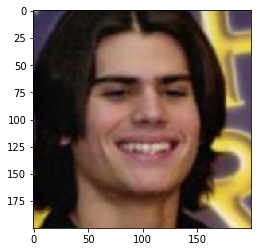

In [ ]:
plt.imshow(x_train[0])

In [ ]:
x_train[0].shape, y_train[0].shape

((200, 200, 3), (8,))

In [ ]:
x_train.shape, y_train.shape

((56, 200, 200, 3), (56, 8))

In [ ]:
x_train[0]

array([[[0.4784314 , 0.49411768, 0.43921572],
        [0.50980395, 0.52156866, 0.4784314 ],
        [0.5882353 , 0.60784316, 0.5921569 ],
        ...,
        [0.28235295, 0.21960786, 0.3254902 ],
        [0.2784314 , 0.21568629, 0.32941177],
        [0.2784314 , 0.21568629, 0.32941177]],

       [[0.41960788, 0.43137258, 0.39607847],
        [0.454902  , 0.4666667 , 0.43921572],
        [0.54901963, 0.5647059 , 0.5686275 ],
        ...,
        [0.28627452, 0.22352943, 0.32941177],
        [0.28235295, 0.21960786, 0.3254902 ],
        [0.28235295, 0.21960786, 0.3254902 ]],

       [[0.33333334, 0.3372549 , 0.35686275],
        [0.3529412 , 0.3529412 , 0.38431376],
        [0.43529415, 0.4431373 , 0.49411768],
        ...,
        [0.2784314 , 0.21568629, 0.32156864],
        [0.27450982, 0.21176472, 0.31764707],
        [0.27058825, 0.20784315, 0.3137255 ]],

       ...,

       [[0.85098046, 0.7607844 , 0.20392159],
        [0.854902  , 0.76470596, 0.22352943],
        [0.854902  , 0

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [ ]:
model_cnn.fit(x_train, y_train, epochs=50)

Epoch 1/50
2/2 [==============================] - 1s 28ms/step - loss: 2.0837 - accuracy: 0.1429
Epoch 2/50
2/2 [==============================] - 0s 28ms/step - loss: 2.0630 - accuracy: 0.1607
Epoch 3/50
2/2 [==============================] - 0s 27ms/step - loss: 2.0305 - accuracy: 0.1607
Epoch 4/50
2/2 [==============================] - 0s 27ms/step - loss: 2.0018 - accuracy: 0.3393
Epoch 5/50
2/2 [==============================] - 0s 23ms/step - loss: 1.9548 - accuracy: 0.3571
Epoch 6/50
2/2 [==============================] - 0s 23ms/step - loss: 1.9075 - accuracy: 0.3571
Epoch 7/50
2/2 [==============================] - 0s 21ms/step - loss: 1.7913 - accuracy: 0.3571
Epoch 8/50
2/2 [==============================] - 0s 21ms/step - loss: 1.6737 - accuracy: 0.5000
Epoch 9/50
2/2 [==============================] - 0s 22ms/step - loss: 1.5023 - accuracy: 0.5714
Epoch 10/50
2/2 [==============================] - 0s 21ms/step - loss: 1.2891 - accuracy: 0.5714
Epoch 11/50
2/2 [============

In [ ]:
model_cnn.evaluate(x_test, y_test)

1/1 [==============================] - 0s 159ms/step - loss: 1.7323 - accuracy: 0.7083


[1.7323371171951294, 0.7083333134651184]

In [ ]:
y_pred=model_cnn.predict(x_test)

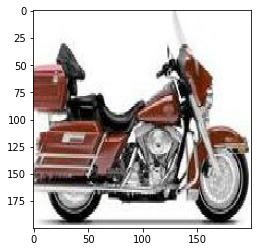

In [ ]:
plt.imshow(x_test[0])

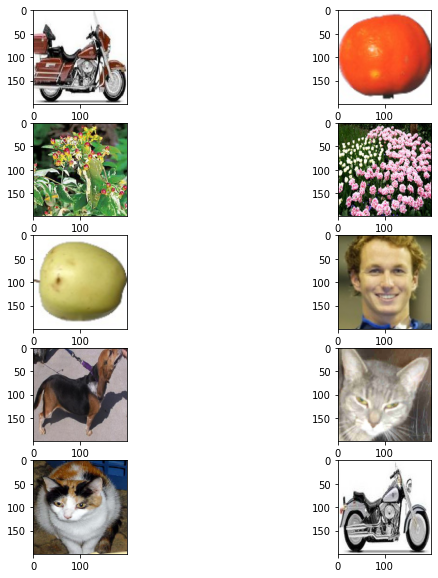

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(5,2,1)
plt.imshow(x_test[0])

plt.subplot(5,2,2)
plt.imshow(x_test[1])

plt.subplot(5,2,3)
plt.imshow(x_test[2])

plt.subplot(5,2,4)
plt.imshow(x_test[3])

plt.subplot(5,2,5)
plt.imshow(x_test[4])

plt.subplot(5,2,6)
plt.imshow(x_test[5])

plt.subplot(5,2,7)
plt.imshow(x_test[6])

plt.subplot(5,2,8)
plt.imshow(x_test[7])

plt.subplot(5,2,9)
plt.imshow(x_test[8])

plt.subplot(5,2,10)
plt.imshow(x_test[9])

In [ ]:
y_predicted=[]
for i in range(10):
  y_predicted.append(np.argmax(y_pred[i]))

# {'airplane': 0, 'car': 1, 'cat': 2, 'dog': 3, 'flower': 4, 'fruit': 5, 'motorbike': 6, 'person': 7}

In [ ]:
y_predicted

[6, 5, 3, 2, 5, 7, 6, 2, 1, 6]

# **Now testing the same model using data augmentation**

In [ ]:
augmented_images=ImageDataGenerator(rescale=1/255)

In [ ]:
total_images_new = augmented_images.flow_from_directory('/content/augmented images',
                                              target_size=(200,200),
                                              batch_size=1)

Found 224 images belonging to 8 classes.


In [ ]:
total_images_new.class_indices

{'airplane': 0,
 'car': 1,
 'cat': 2,
 'dog': 3,
 'flower': 4,
 'fruit': 5,
 'motorbike': 6,
 'person': 7}

In [ ]:
total_images_new.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7], dtype=int32)

In [ ]:
images_new=[]
labels_new=[]
for i in range(len(total_images_new)):
  images_new.append(total_images_new[i][0])
  labels_new.append(total_images_new[i][1])

In [ ]:
for i in range(len(images_new)):
  images_new[i]=images_new[i].reshape(200, 200, 3)
  labels_new[i]=labels_new[i].reshape(8,)

In [ ]:
images_new[0].shape

(200, 200, 3)

In [ ]:
from sklearn.model_selection import train_test_split
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(images_new, labels_new, test_size=0.3)

In [ ]:
x_train_new=np.array(x_train_new)
y_train_new=np.array(y_train_new)
x_test_new=np.array(x_test_new)
y_test_new=np.array(y_test_new)

In [ ]:
x_train_new.shape, y_train_new.shape, x_test_new.shape, y_test_new.shape

((156, 200, 200, 3), (156, 8), (68, 200, 200, 3), (68, 8))

In [ ]:
# CNN

model_cnn_new=keras.Sequential([
                            keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(200,200,3)),
                            keras.layers.MaxPooling2D((2,2)),

                            keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu'),
                            keras.layers.MaxPooling2D((2,2)),

                            keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu'),
                            keras.layers.MaxPooling2D((2,2)),

                            keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu'),
                            keras.layers.MaxPooling2D((2,2)),

                            keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu'),
                            keras.layers.MaxPooling2D((2,2)),

                            keras.layers.Flatten(),
                            keras.layers.Dense(1000, activation='relu'),
                            keras.layers.Dense(100, activation='relu'),
                            keras.layers.Dense(8, activation='sigmoid')
                            ])
model_cnn_new.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 99, 99, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 97, 97, 16)        2320      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 48, 48, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 46, 46, 16)        2320      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 23, 23, 16)      

In [ ]:
model_cnn_new.compile(optimizer='adam',
                  loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
                  metrics=['accuracy'])

In [ ]:
x_train_new[0].shape

(200, 200, 3)

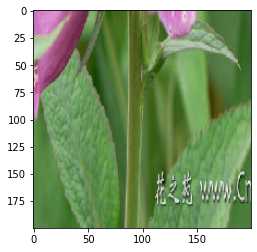

In [ ]:
plt.imshow(x_train_new[0])

In [ ]:
x_train_new[0].shape, y_train_new[0].shape

((200, 200, 3), (8,))

In [ ]:
x_train_new.shape, y_train_new.shape

((156, 200, 200, 3), (156, 8))

In [ ]:
x_train_new[0]

array([[[0.7686275 , 0.4431373 , 0.7176471 ],
        [0.7843138 , 0.43921572, 0.7294118 ],
        [0.8078432 , 0.44705886, 0.7411765 ],
        ...,
        [0.24705884, 0.4039216 , 0.20000002],
        [0.25882354, 0.4156863 , 0.21960786],
        [0.25490198, 0.41960788, 0.22352943]],

       [[0.7843138 , 0.4666667 , 0.7294118 ],
        [0.7843138 , 0.44705886, 0.73333335],
        [0.8117648 , 0.45882356, 0.7490196 ],
        ...,
        [0.24313727, 0.40000004, 0.19607845],
        [0.25490198, 0.41176474, 0.20784315],
        [0.2509804 , 0.4156863 , 0.21960786]],

       [[0.78823537, 0.47058827, 0.7294118 ],
        [0.7843138 , 0.44705886, 0.7254902 ],
        [0.80392164, 0.45098042, 0.7411765 ],
        ...,
        [0.24705884, 0.39607847, 0.19607845],
        [0.25490198, 0.41176474, 0.20784315],
        [0.25882354, 0.4156863 , 0.21176472]],

       ...,

       [[0.34509805, 0.5137255 , 0.29411766],
        [0.3529412 , 0.52156866, 0.3019608 ],
        [0.3529412 , 0

In [ ]:
y_train_new[0]

array([0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [ ]:
model_cnn_new.fit(x_train_new, y_train_new, epochs=50)

Epoch 1/50
5/5 [==============================] - 1s 114ms/step - loss: 2.0970 - accuracy: 0.0962
Epoch 2/50
5/5 [==============================] - 0s 21ms/step - loss: 2.0591 - accuracy: 0.2372
Epoch 3/50
5/5 [==============================] - 0s 22ms/step - loss: 2.0060 - accuracy: 0.3333
Epoch 4/50
5/5 [==============================] - 0s 21ms/step - loss: 1.8513 - accuracy: 0.3910
Epoch 5/50
5/5 [==============================] - 0s 23ms/step - loss: 1.5750 - accuracy: 0.4295
Epoch 6/50
5/5 [==============================] - 0s 23ms/step - loss: 1.3839 - accuracy: 0.5385
Epoch 7/50
5/5 [==============================] - 0s 22ms/step - loss: 1.1848 - accuracy: 0.5705
Epoch 8/50
5/5 [==============================] - 0s 22ms/step - loss: 1.0716 - accuracy: 0.6731
Epoch 9/50
5/5 [==============================] - 0s 22ms/step - loss: 0.8816 - accuracy: 0.7179
Epoch 10/50
5/5 [==============================] - 0s 22ms/step - loss: 0.8019 - accuracy: 0.7436
Epoch 11/50
5/5 [===========

In [ ]:
model_cnn_new.evaluate(x_test_new, y_test_new)

3/3 [==============================] - 0s 75ms/step - loss: 1.0332 - accuracy: 0.7941


[1.0331916809082031, 0.7941176295280457]

In [ ]:
y_pred_new=model_cnn_new.predict(x_test_new)

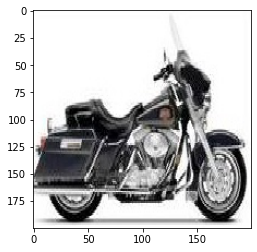

In [ ]:
plt.imshow(x_test_new[0])

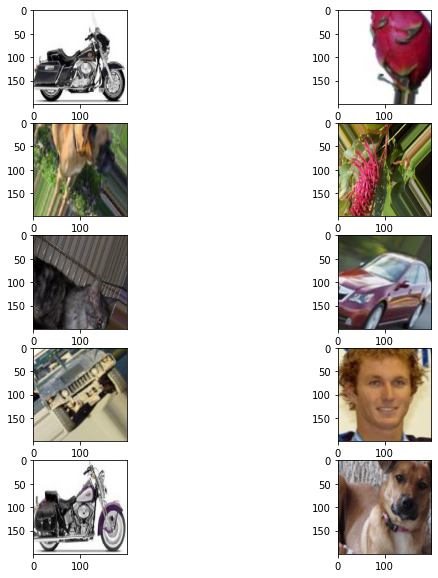

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(5,2,1)
plt.imshow(x_test_new[0])

plt.subplot(5,2,2)
plt.imshow(x_test_new[1])

plt.subplot(5,2,3)
plt.imshow(x_test_new[2])

plt.subplot(5,2,4)
plt.imshow(x_test_new[3])

plt.subplot(5,2,5)
plt.imshow(x_test_new[4])

plt.subplot(5,2,6)
plt.imshow(x_test_new[5])

plt.subplot(5,2,7)
plt.imshow(x_test_new[6])

plt.subplot(5,2,8)
plt.imshow(x_test_new[7])

plt.subplot(5,2,9)
plt.imshow(x_test_new[8])

plt.subplot(5,2,10)
plt.imshow(x_test_new[9])

In [ ]:
y_predicted_new=[]
for i in range(10):
  y_predicted_new.append(np.argmax(y_pred_new[i]))

# {'airplane': 0, 'car': 1, 'cat': 2, 'dog': 3, 'flower': 4, 'fruit': 5, 'motorbike': 6, 'person': 7}

In [ ]:
y_predicted_new

[0, 2, 3, 4, 2, 1, 0, 7, 6, 3]

# **So, we see that the accuracy improved from 70% to almost 80% when we used data augmentation.**